
Este notebook reúne análises exploratórias e visualizações que desenvolvi para praticar (e demonstrar) decisões de **design de gráficos**, tratamento de dados e interpretação orientada a negócio. A ideia é deixar registrado não só o “gráfico final”, mas também o raciocínio que levou a cada escolha.

# Seção 1 | Comparando dados (varejo)

## Contexto e objetivo
---

Eu trabalho este projeto em dois cenários para mostrar diferentes formas de comparação e distribuição de dados:

- **Cenário 1 (Varejo):** pedidos de uma rede de lojas de departamentos (2016–2019). Aqui, o objetivo é responder perguntas de negócio como evolução de vendas, itens mais lucrativos, participação regional e padrões de envio.
- **Cenário 2 (Qualidade/Produção):** medições de produtos (volume e dimensões) coletadas em amostras. Aqui, o objetivo é entender **distribuição**, **variabilidade** e possíveis **desvios/outliers**.

Ao longo do notebook eu priorizo:

- clareza (títulos, destaques e anotações)
- escolha de gráfico adequada à pergunta
- leitura rápida (menos “poluição visual”, mais contexto do que importa)

> Observação: as bases são públicas e são carregadas via URL para facilitar a reprodução.

### Paleta de cores

|Azul|||||
|------|------|------|------|------|
| AZUL1 |AZUL2 |AZUL3 |AZUL4 |AZUL5 |
|#03045e | #0077b6 | #00b4d8| #90e0ef | #CDDBF3 |
|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL1.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL2.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL3.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL4.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AZUL5.png?raw=true)|

&nbsp;

|Cinza|||||
|------|------|------|------|------|
| CINZA1 |CINZA2 |CINZA3 |CINZA4 |CINZA5|
|#212529 | #495057| #adb5bd | #dee2e6| #f8f9fa |
| ![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA1.png?raw=true)  |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA2.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA3.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA4.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/CINZA5.png?raw=true)|
&nbsp;

|Misto|||||
|------|------|------|------|------|
| VERMELHO1 |LARANJA1 |AMARELO1 | VERDE1 |VERDE2 |
|#e76f51 | #f4a261 | #e9c46a |#0C8040 | #4c956c |#2a9d8f|
| ![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/VERMELHO1.png?raw=true) |![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/LARANJA1.png?raw=true)|![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/AMARELO1.png?raw=true)| ![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/VERDE1.png?raw=true) | ![adicionar desc](https://github.com/afonsosr2/dataviz-graficos/blob/master/imagens/VERDE2.png?raw=true) |


In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2, VERDE3 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f', '#264653'

## 1.1 Gráfico de colunas (visão anual)
---

### Cenário 1 | Vendas no varejo (2016–2019)

A empresa quer entender **como as vendas e o lucro se comportam ao longo do tempo** e quais recortes (produto, região e logística) ajudam a explicar o desempenho.

Minha abordagem aqui é:

- começar com métricas agregadas (visão anual)
- aprofundar para composição (regiões)
- comparar perfis de uso (B2B vs B2C)
- fechar com séries temporais (sazonalidade/trimestres)

In [2]:
import pandas as pd

In [3]:
# Importando o relatório de vendas e atualizando as colunas de pedido e envio para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format='%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format='%Y-%m-%d')

vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [4]:
# Verificando os tipos de dados e se existem dados nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

Com a base carregada e validada (tipos e ausência de nulos), eu conduzo a análise com perguntas objetivas:

1. Qual o total de vendas por ano? Qual ano teve melhor desempenho?
2. Quais são os 7 produtos com maior lucro no período?
3. Como as vendas anuais se distribuem por região?
4. Qual modo de envio é mais utilizado? O padrão muda entre B2B e B2C?
5. Qual o total de vendas por trimestre no estado de São Paulo?
6. Qual o faturamento trimestral em cada região?

A seguir, respondo cada pergunta com um gráfico e uma interpretação curta (o que eu observo e por que isso importa).

## 1.2 Gráfico de colunas (comparação direta)
---

<img src="https://github.com/afonsosr2/dataviz-graficos/blob/b86ed16b3652d0226512a1ecf74d044d197723d8/imagens/Tipos_Graficos/Gr%C3%A1fico%20(comparando%20e%20agrupando%20dados).png?raw=true" alt="inserir alt" height="343">


<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>


### **Pergunta 1 -** Qual o total de vendas por ano? E qual ano performou melhor em nossa base de dados?

#### Tratando os dados para gerar a visualização

In [5]:
# Criando um df com os dados desejados
df_vendas_ano = vendas.copy()
df_vendas_ano = df_vendas_ano[['data_pedido', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido e agrupando os dados por ano
df_vendas_ano['ano'] = df_vendas_ano.data_pedido.dt.year
df_vendas_ano.drop(labels = "data_pedido", axis = 1, inplace = True)
df_vendas_ano = df_vendas_ano.groupby(['ano']).aggregate("sum")

df_vendas_ano

,vendas
ano,
2016,1402652.33
2017,1489179.52
2018,1884161.41
2019,2305006.29


#### Gerando o gráfico

C:\Users\David\AppData\Local\Temp\ipykernel_13296\1960705003.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, y='vendas', x = df_vendas_ano.index, palette = cores)
C:\Users\David\AppData\Local\Temp\ipykernel_13296\1960705003.py:13: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_vendas_ano, y='vendas', x = df_vendas_ano.index, palette = cores)


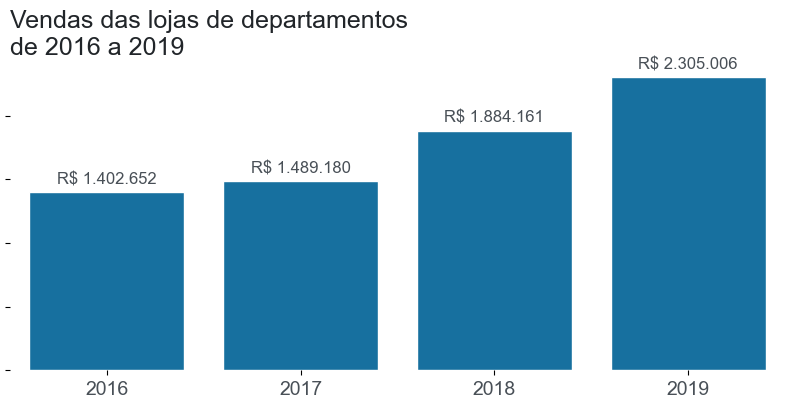

In [6]:
## Gerando a função para criar o gráfico de colunas

def grafico_vendas(cores: list=[AZUL2]):
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  sns.set_theme(style="white")

  # Gerando o gráfico de colunas 
  ax = sns.barplot(data=df_vendas_ano, y='vendas', x = df_vendas_ano.index, palette = cores)

  # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos\nde 2016 a 2019', loc='left', fontsize=18, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(df_vendas_ano['vendas']):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')  
      offset = 1e5  # offset de 100.000
      ax.text(i, valor + offset, qtd, color= CINZA2, fontsize=12, ha='center', va='center')
      
  return ax

ax = grafico_vendas()

## Destaque e anotações no gráfico
---

C:\Users\David\AppData\Local\Temp\ipykernel_13296\1960705003.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_vendas_ano, y='vendas', x = df_vendas_ano.index, palette = cores)


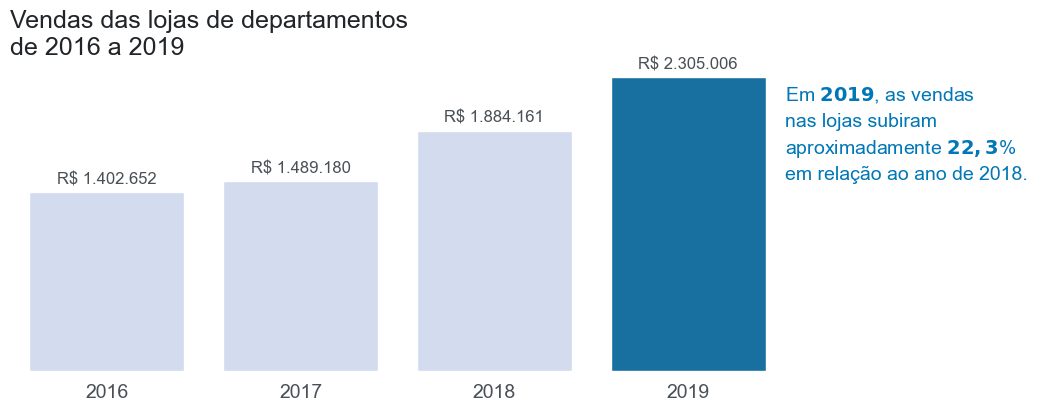

In [7]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Definindo as cores do gráfico
cores = []
for ano in df_vendas_ano.index:
    if df_vendas_ano.loc[ano,"vendas"] == df_vendas_ano["vendas"].max():
        cores.append(AZUL2)
    else:
        cores.append(AZUL5)

## Chamando a função do gráfico de colunas
ax = grafico_vendas(cores)

# Anotando uma conclusão no gráfico
ax.text(3.5, 1.5e6,
         'Em $\\bf{2019}$, as vendas\n'
         'nas lojas subiram\n'
         'aproximadamente $\\bf{22,3}$%\n'
         'em relação ao ano de 2018.',
         fontsize=14,
         linespacing=1.45,
         color=AZUL2)

fig = ax.get_figure()

<font color=green size=4> Leitura e insight </font>

---

Nesta visualização eu uso **colunas** para facilitar a comparação ano a ano e aplico **destaque por cor** para guiar a atenção ao melhor período.

O principal ponto que eu levo daqui é que houve uma **aceleração do faturamento no fim da série**, o que abre espaço para investigações complementares (mix de produtos, crescimento regional e impacto de descontos).

## 1.3 Gráfico de barras (ranking)
---

### **Pergunta 2 -** Qual é o top 7 produtos que mais apresentaram lucros em nosso catálogo durante o período representado?

#### Tratando os dados para gerar a visualização

In [8]:
# Criando um df com os dados desejados
top_lucro = vendas.copy()

top_lucro = top_lucro[['tipo_produto','lucro']]
top_lucro = top_lucro.groupby(['tipo_produto']).aggregate("sum").sort_values('lucro', ascending = False)
top_7 = top_lucro[:7]

top_7

,lucro
tipo_produto,
peças de reposição,91148.67
pneus,67460.05
ferramentas automotivas,63330.22
pesticidas,53343.89
ferramentas de jardinagem,53202.88
ferramentas,41020.34
vasos,33941.85


#### Gerando o gráfico

C:\Users\David\AppData\Local\Temp\ipykernel_13296\3100788556.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_7, x='lucro', y = top_7.index, palette = cores)


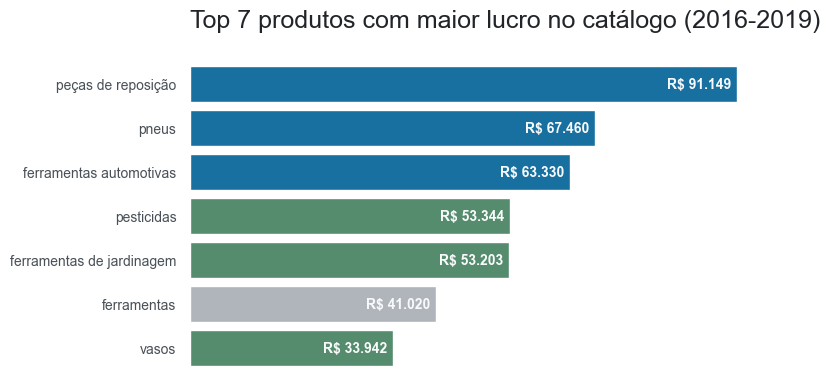

In [9]:
## Gerando a função para criar o gráfico de barras

def grafico_top_7():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(right=0.7)
  sns.set_theme(style="white")

  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL2, AZUL2, VERDE1, VERDE1, CINZA3, VERDE1]

  # Gerando o gráfico de colunas 
  ax = sns.barplot(data=top_7, x='lucro', y = top_7.index, palette = cores)

  ## Personalizando o gráfico
  ax.set_title('Top 7 produtos com maior lucro no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
  sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
  for i, valor in enumerate(top_7['lucro']):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')  
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

  return ax

ax = grafico_top_7()

## **Adicionando texto com destaques**

---




Criando uma função para escrita de texto utilizando diferentes cores. 

> Não existe uma função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)



In [10]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

#### Gerando o gráfico

<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:15: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:15: SyntaxWarning: invalid escape sequence '\ '
C:\Users\David\AppData\Local\Temp\ipykernel_13296\387209069.py:10: SyntaxWarning: invalid escape sequence '\ '
  '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
C:\Users\David\AppData\Local\Temp\ipykernel_13296\387209069.py:13: SyntaxWarning: invalid escape sequence '\ '
  '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
C:\Users\David\AppData\Local\Temp\ipykernel_13296\387209069.py:15: SyntaxWarning: invalid escape sequence '\ '
  'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
C:\Users\David\AppData\Local\Temp\ipykernel_13296\3100788556.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

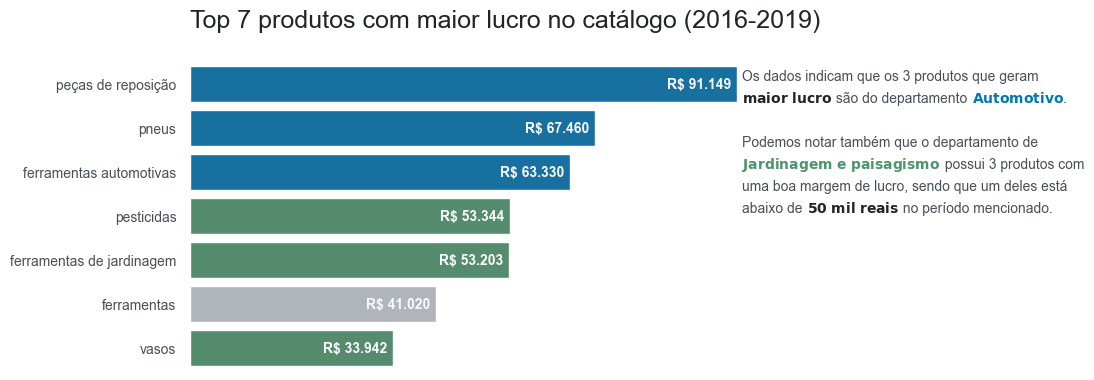

In [11]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_top_7()

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 2.9,                                                        # coordenadas
    'Os dados indicam que os 3 produtos que geram\n'                    # texto
    '$\\bf{maior\ lucro}$|| são do departamento ||$\\bf{Automotivo}$.\n'
    '\n'
    'Podemos notar também que o departamento de\n'
    '$\\bf{Jardinagem\ e\ paisagismo}$|| possui 3 produtos com\n'
    'uma boa margem de lucro, sendo que um deles está\n'
    'abaixo de ||$\\bf{50\ mil\ reais}$|| no período mencionado.',
    [[CINZA2],                        # linha 1                          # cores
     [CINZA1, CINZA2, AZUL2],         # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [VERDE1, CINZA2],                # linha 5
     [CINZA2],                        # linha 5
     [CINZA2, CINZA1, CINZA2]        # linha 7
    ],
    esp=22, # espaçamento
    ax=ax, # figura onde desenhar o texto
    fontsize=10)

fig = ax.get_figure()

<font color=green size=4> Leitura e insight </font>

---

Aqui eu uso **barras horizontais** para ranquear itens com nomes longos, reduzindo atrito de leitura.

O destaque principal é a **concentração de lucro em poucos produtos**, com forte presença do departamento **Automotivo** entre os primeiros colocados. Isso sugere priorizar:

- revisão de estoque/precificação desses SKUs
- análise de margem vs. volume (para evitar “lucro alto” com baixa escala)
- oportunidades de cross-sell com itens adjacentes do mesmo departamento

## 1.4 Gráfico de colunas empilhadas (composição por região)
---

<img src="https://github.com/afonsosr2/dataviz-graficos/blob/b86ed16b3652d0226512a1ecf74d044d197723d8/imagens/Tipos_Graficos/Gr%C3%A1fico%20(comparando%20e%20agrupando%20dados).png?raw=true" alt="inserir alt" height="343">


<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>


### Visualização
---

### **Pergunta 3 -** Se separarmos o total de vendas por ano por região? O que conseguimos observar em nossos dados?

#### Tratando os dados para gerar a visualização

In [12]:
# Criando um df com os dados desejados
df_vendas_reg = vendas.copy()
df_vendas_reg = df_vendas_reg[['data_pedido','regiao', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_vendas_reg['ano'] = df_vendas_reg.data_pedido.dt.year
df_vendas_reg.drop(labels = "data_pedido", axis = 1, inplace = True)

df_vendas_reg

,regiao,vendas,ano
0,Sudeste,890.66,2018
1,Sudeste,2488.59,2018
2,Sudeste,49.72,2018
3,Sul,3255.75,2017
4,Sul,76.04,2017
...,...,...,...
8935,Sudeste,123.22,2018
8936,Nordeste,271.97,2019
8937,Nordeste,700.75,2019
8938,Nordeste,85.83,2016


In [13]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por região
vendas_reg = pd.crosstab(index = df_vendas_reg.ano, columns = df_vendas_reg.regiao, values = df_vendas_reg.vendas, aggfunc="sum")

# Ajustando a tabela em ordem descrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
vendas_reg

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
ano,,,,,
2016,739602.18,378521.83,121653.63,101580.57,61294.12
2017,803005.61,320804.28,149215.00,124164.47,91990.16
2018,1033836.21,401365.77,208068.71,108710.09,132180.63
2019,1146764.08,600738.87,257781.18,170311.34,129410.82


#### Gerando o gráfico

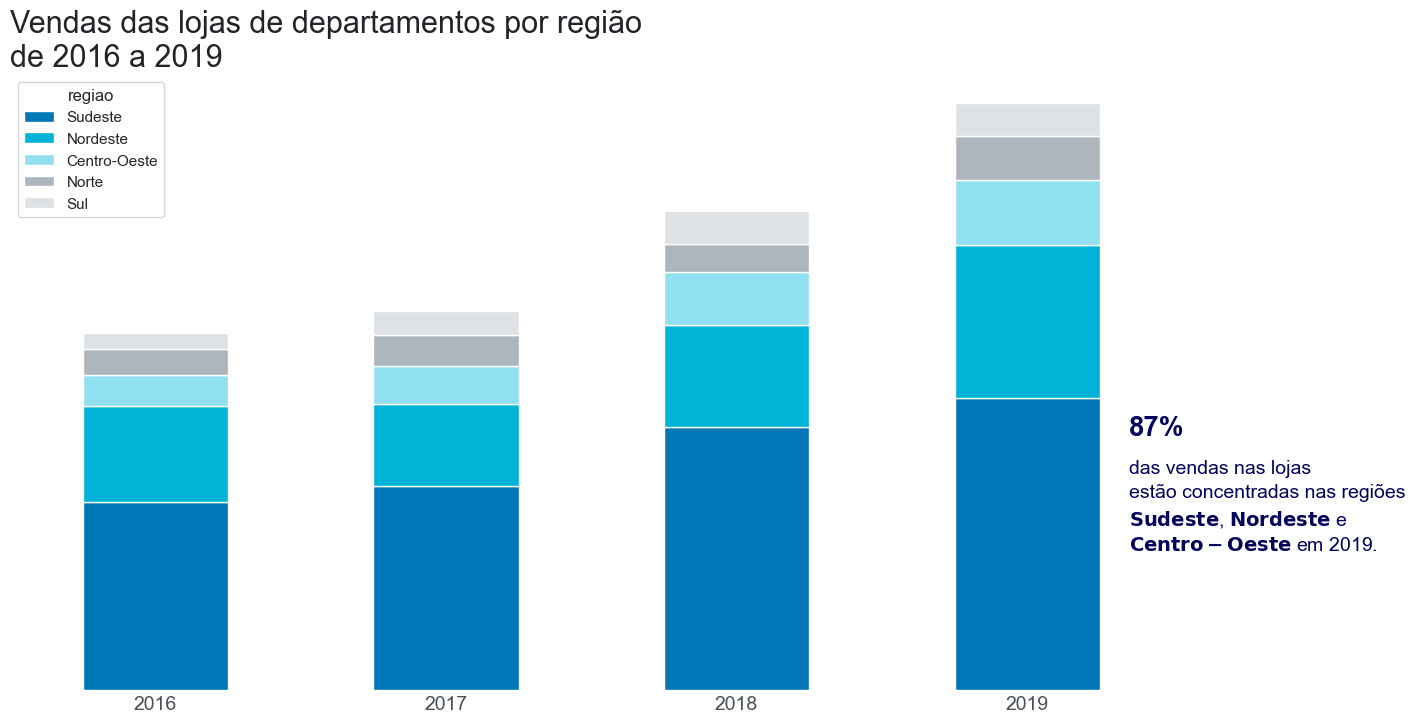

In [14]:
## Gerando a função para criar o gráfico de barras

def grafico_vendas_regiao():
  # Definindo as cores do gráfico
  cores = [AZUL2, AZUL3, AZUL4, CINZA3, CINZA4]

  # Gerando o gráfico de colunas empilhadas 
  ax = vendas_reg.plot(kind='bar', stacked = True, figsize= (15, 8), color = cores)

  # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos por região\nde 2016 a 2019', loc='left', fontsize=22, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  # Anotando uma conclusão no gráfico
  ax.text(3.35, 1e6, '87%', fontweight='bold', fontsize=20, color=AZUL1)
  ax.text(3.35, 5.5e5,
          'das vendas nas lojas\n'
          'estão concentradas nas regiões\n'
          '$\\bf{Sudeste}$, $\\bf{Nordeste}$ e\n'
          '$\\bf{Centro-Oeste}$ em 2019.',
          fontsize=14,
          linespacing=1.45,
          color=AZUL1)
  
  return ax

ax = grafico_vendas_regiao()

### Refinos de leitura (rótulos e legenda)
---

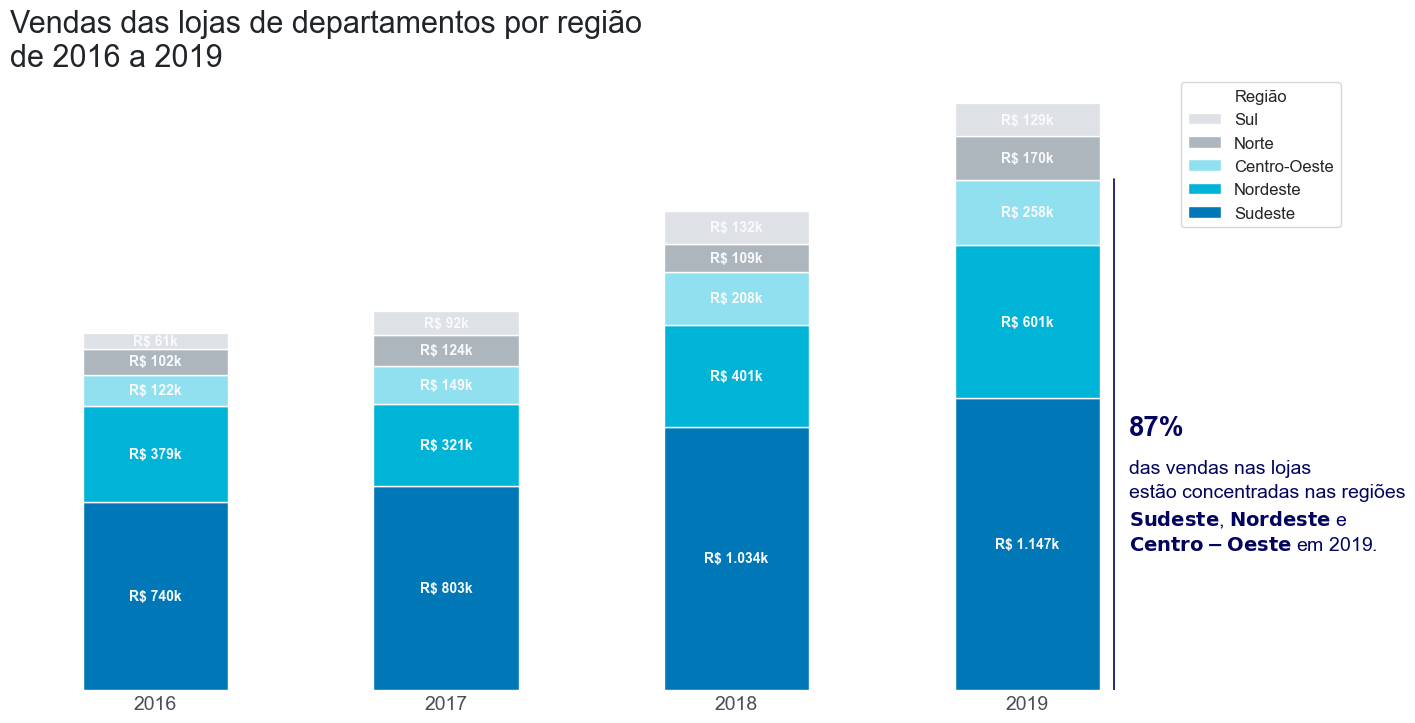

In [15]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função do gráfico de barras
ax = grafico_vendas_regiao()

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1, 1), title='Região', reverse=True, title_fontsize  = 12, fontsize = 12)

# Adicionando os valores 
for container in ax.containers:
    labels = [f'R$ {valor.get_height()/1000:,.0f}k'.replace(',','.') for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 10, color = CINZA5, fontweight = 'bold')

ax.axvline(3.3, ymin=0.0, ymax=0.83, color=AZUL1, linewidth=1.2)

fig = ax.get_figure()

<font color=green size=4> Leitura e insight </font>

---

O empilhamento permite comparar **total anual** e, ao mesmo tempo, a **composição por região**.

O que fica claro é a **concentração das vendas** nas regiões **Sudeste, Nordeste e Centro-Oeste** no fim da série. Como próximo passo, eu validaria:

- participação por estado (para achar “pontos fora da curva” dentro da região)
- evolução de mix de produtos por região
- impacto de prazo/modo de envio na conversão por região

## 1.5 Barras empilhadas (B2B vs B2C por modo de envio)
---

### **Pergunta 4 -** Qual o modo de envio mais utilizado pelos clientes da loja? É proporcional para B2B e B2C?

#### Tratando os dados para gerar a visualização

In [16]:
# Criando um df com os dados desejados
df_envio = vendas.copy()
df_envio = df_envio[['modo_envio', 'segmento_cliente']]

# Criando uma tabela cruzada (crosstab) com os modos de envio divididos pelos clientes B2C e B2B
df_envio_seg = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente).sort_values("B2B")

df_envio_seg

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,207,288
Envio rápido,676,673
Econômica,829,906
Entrega padrão,2552,2809


In [17]:
# Criando uma tabela cruzada (crosstab) com os modos de envio divididos pelos clientes B2C e B2B nomarlizado
df_envio_normalizado = pd.crosstab(index = df_envio.modo_envio, columns = df_envio.segmento_cliente, normalize = "index")

df_envio_normalizado

segmento_cliente,B2B,B2C
modo_envio,,
24 horas,0.418182,0.581818
Econômica,0.477810,0.522190
Entrega padrão,0.476031,0.523969
Envio rápido,0.501112,0.498888


#### Gerando o gráfico

In [18]:
# Função para escrita de texto utilizando diferentes cores. Não existe uma 
# função nativa para isso. (Adaptado de https://github.com/empathy87/storytelling-with-data)
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

C:\Users\David\AppData\Local\Temp\ipykernel_13296\2706681148.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


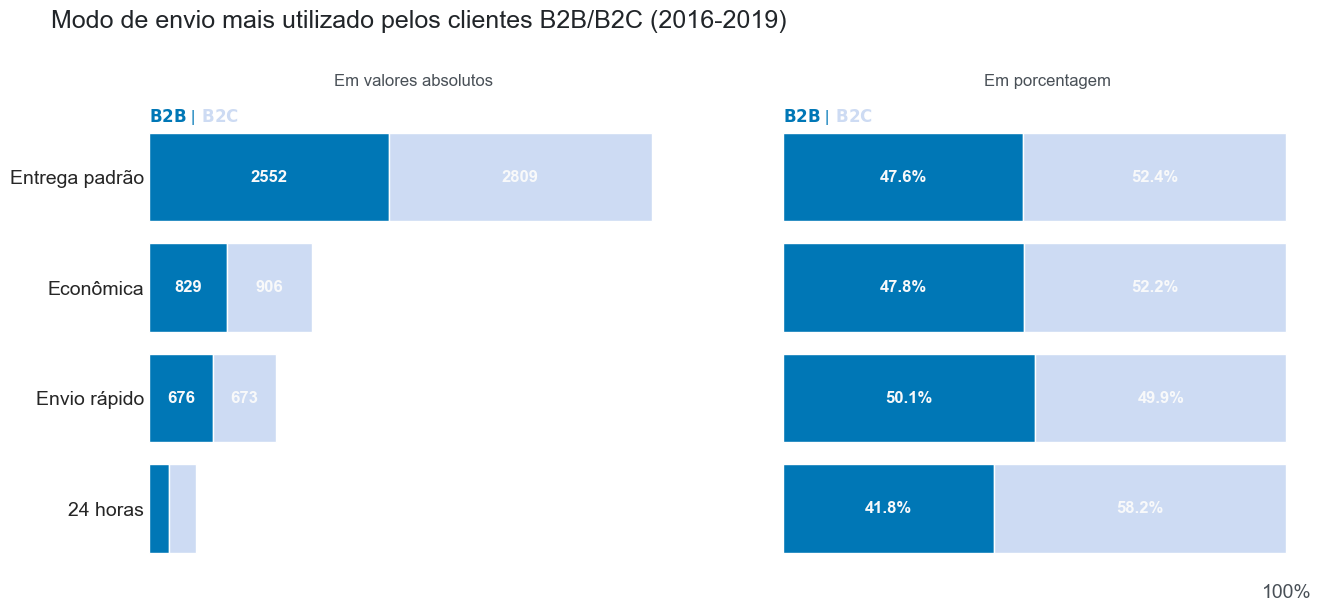

In [19]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt

# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(15,6), sharey = True)

# Definindo as cores do gráfico
cores = [AZUL2, AZUL5]

# GRÁFICO 1 - Barras empilhadas

axs[0].barh(df_envio_seg.index, df_envio_seg["B2B"], color = cores[0])
axs[0].barh(df_envio_seg.index, df_envio_seg["B2C"], left = df_envio_seg["B2B"], color = cores[1])
axs[0].set_title('Em valores absolutos\n', color = CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([])
axs[0].yaxis.set_tick_params(labelsize=14, color = CINZA2)
axs[0].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[0].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[0], fontsize=12) # legenda

#######################################

# GRÁFICO 2 - Barras empilhadas 100 %

axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2B"], color = cores[0])
axs[1].barh(df_envio_normalizado.index, df_envio_normalizado["B2C"], left = df_envio_normalizado["B2B"], color = cores[1])
axs[1].set_title('Em porcentagem\n', color = CINZA2)
axs[1].set_xlabel('100%', color = CINZA2, size = 14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([])
axs[1].set_frame_on(False)

# remover todos os ticks do eixo x e y
axs[1].tick_params(axis='both', which='both', length=0)

texto_colorido(0, 3.5, '$\\bf{B2B}$ | || $\\bf{B2C}$', cores = [cores], ax=axs[1], fontsize=12) # legenda

#######################################

# Título dos gráficos
fig.suptitle("Modo de envio mais utilizado pelos clientes B2B/B2C (2016-2019)\n", 
             fontsize=18, color=CINZA1, ha = 'right', x = 0.55, y = 1.05)

# Valores das barras
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 300 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig.show()

<font color=green size=4> Leitura e insight </font>

---

Aqui eu coloco lado a lado:

- **volume absoluto** (quantidade de pedidos)
- **proporção** (participação B2B vs B2C dentro de cada modo)

Isso evita conclusões erradas do tipo “um modo é maior” quando, na prática, ele só tem mais pedidos no total.

O padrão geral mostra **Entrega padrão** como dominante em volume, e uma distribuição **relativamente equilibrada** entre B2B e B2C na maioria dos modos — sinal de que logística atende ambos os perfis de forma parecida. Se eu fosse aprofundar, eu cruzaria com **prazo real (data_envio - data_pedido)** e **lucro por modo de envio**.

## 1.6 Série temporal (trimestres)
---

<img src="https://github.com/afonsosr2/dataviz-graficos/blob/b86ed16b3652d0226512a1ecf74d044d197723d8/imagens/Tipos_Graficos/Gr%C3%A1fico%20(s%C3%A9ries%20de%20tempo).png?raw=true" alt="inserir alt" height="343">

<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>


### Gráfico de linha (vendas trimestrais)
---

### **Pergunta 5 -** Qual o total de vendas por trimestre do estado de São Paulo?

#### Tratando os dados para gerar a visualização

In [20]:
# Criando um df com os dados desejados
df_sp = vendas.copy()
df_sp = df_sp.query('estado == "São Paulo"')[["data_pedido", "vendas"]]

# Agrupando as vendas por trimestre e arredondando valores para milhares
df_sp.set_index("data_pedido", inplace =True)
df_sp = df_sp.resample('Q').agg('sum')
df_sp["vendas"] = round(df_sp["vendas"] / 1e3 , 2)
df_sp = df_sp.reset_index()
df_sp

C:\Users\David\AppData\Local\Temp\ipykernel_13296\3401620028.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_sp = df_sp.resample('Q').agg('sum')


,data_pedido,vendas
0,2016-03-31,41.87
1,2016-06-30,43.79
2,2016-09-30,154.91
3,2016-12-31,144.82
4,2017-03-31,36.13
5,2017-06-30,76.86
6,2017-09-30,129.76
7,2017-12-31,197.94
8,2018-03-31,44.26
9,2018-06-30,109.64


#### Gerando o gráfico

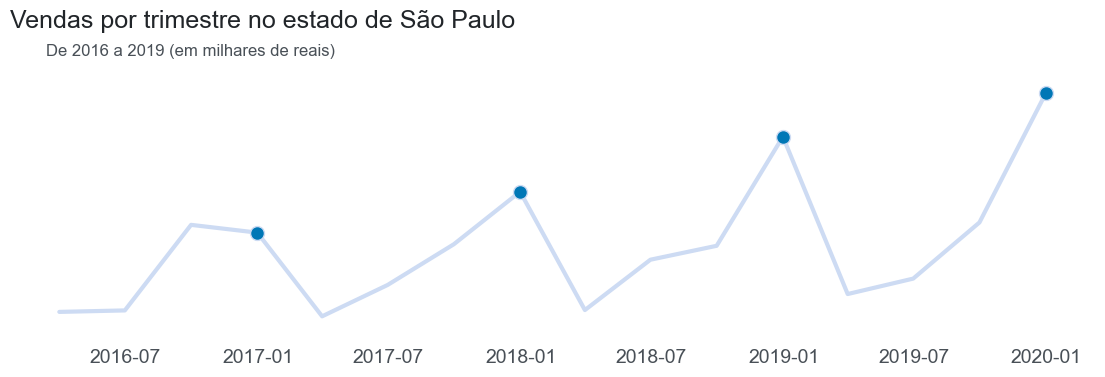

In [21]:
## Gerando a função para o gráfico de linha

def grafico_vendas_sp_tri():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(14,4))

  # Gráfico de linha
  pontos_a_marcar = [True if mes == 12 else False for mes in df_sp["data_pedido"].dt.month]                                                    

  ax.plot(df_sp["data_pedido"], df_sp["vendas"], lw=3, color = AZUL5, marker ="o", 
          markersize = 10, markerfacecolor = AZUL2, markevery = pontos_a_marcar)

  ## Personalizando o gráfico
  ax.set_title('Vendas por trimestre no estado de São Paulo', fontsize = 18, color = CINZA1, loc='left')
  ax.text(0.3, 0.95, "De 2016 a 2019 (em milhares de reais)", transform=ax.transAxes, color= CINZA2, fontsize=12, ha='right', va='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  ## Ajustes no eixo y
  # Descrevendo o limite mínimo e máximo do eixo y
  plt.ylim(0, 400)

  return ax

ax = grafico_vendas_sp_tri()

### Refinos de leitura (eixo temporal e destaques)
---

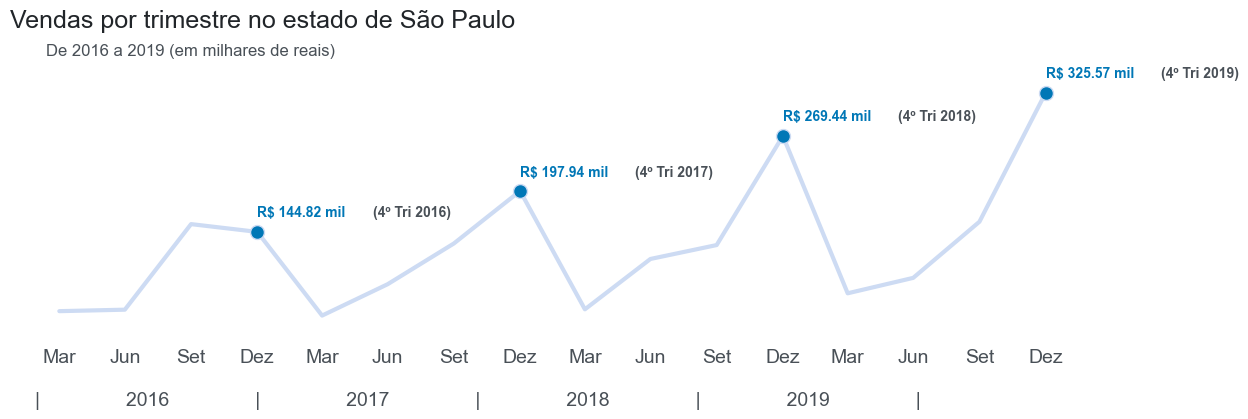

In [22]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.dates as mdates

# Chamando a função que gera o gráfico de linha
ax = grafico_vendas_sp_tri()

## Ajustes no eixo x
# Definindo o intervalo em trimestres e colocando os nomes dos meses nos labels
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
x_labels = ["Mar", "Jun", "Set", "Dez"] * 4 # traduzindo os labels do eixo X
ax.set_xticks(df_sp.data_pedido)
ax.set_xticklabels(x_labels, ha="center")

# Ajustando o eixo x colocando um nível acima de granularidade por meio da exibição do ano
texto = [16*" " + str(i) + 16*" " for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, - 80, f'|{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}|', fontsize=14, color=CINZA2)

# Destacando os valores do 4º trimestre
ano = 0
for i in range(3, len(df_sp["vendas"]), 4):
  ax.text(x = ax.get_xticks()[i], y = df_sp["vendas"][i] + 20, s = f"R$ {df_sp['vendas'][i]} mil", color = AZUL2, weight = "bold", fontsize = 10)
  ax.text(x = ax.get_xticks()[i] + 160, y = df_sp["vendas"][i] + 20, s = f"(4º Tri {2016 + ano})", color = CINZA2, weight = "bold", fontsize = 10)
  ano +=1

fig = ax.get_figure()

<font color=green size=4> Leitura e insight </font>

---

Séries de tempo funcionam melhor com **linhas** porque deixam a tendência “aparecer” sem esforço.

Ao destacar o **4º trimestre** de cada ano, eu evidencio um padrão recorrente de **picos no fim do ano** (sazonalidade). Em um contexto real, eu usaria isso para:

- planejar estoque e capacidade logística
- revisar política de descontos no período
- comparar com campanhas (mídia/CRM) para atribuição

## 1.7 Série temporal por região (comparação de tendências)
---

### **Pergunta 6 -** Qual o faturamento por trimestre em cada região?

#### Tratando os dados para gerar a visualização

In [23]:
# Criando um df com os dados desejados
df_regiao = vendas.copy()
df_regiao = df_regiao[["regiao", "data_pedido", "vendas"]]

# Criando uma tabela cruzada (crosstab) com os valores de venda por dia por região
df_regiao = pd.crosstab(index = df_regiao.data_pedido, columns = df_regiao.regiao, values = df_regiao.vendas, aggfunc="sum")

# Ajustando a tabela em ordem descrescente dos estados que mais executam vendas
df_regiao = df_regiao[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
df_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [24]:
# Agrupando as vendas por trimestre
df_regiao = df_regiao.resample('Q').agg('sum')
df_regiao = round(df_regiao/1e3, 2)
df_regiao

C:\Users\David\AppData\Local\Temp\ipykernel_13296\1271733004.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_regiao = df_regiao.resample('Q').agg('sum')


regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


#### Gerando o gráfico

In [25]:
# Importando a biblioteca
import plotly.express as px

# Gerando um gráfico de linha com o faturamento da loja por trimestre dividido por região
fig = px.line(df_regiao, x=df_regiao.index, y=df_regiao.columns, markers = True, labels={"regiao": "Região"}, 
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15, 
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24, 
                  title_text='Faturamento da loja de departamentos por trimestre' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos trimestres
labels = ['T1<br>2016', 'T2<br>2016', 'T3<br>2016', 'T4<br>2016', 
          'T1<br>2017', 'T2<br>2017', 'T3<br>2017', 'T4<br>2017',
          'T1<br>2018', 'T2<br>2018', 'T3<br>2018', 'T4<br>2018',
          'T1<br>2019', 'T2<br>2019', 'T3<br>2019', 'T4<br>2019',]
fig.update_xaxes(ticktext = labels, tickvals=df_regiao.index)

fig.show()

# **3.4 - Personalizando o texto informativo (hover)**


---



In [26]:
# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}")
fig.update_layout(hovermode="closest")    # para exibir apenas do dado que passamos o mouse
# fig.update_layout(hovermode="x")          # para exibir todos os dados do período em cada linha 
# fig.update_layout(hovermode="x unified")  # para exibir o resumo de todos os dados no período

fig.show()

<font color=green size=4> Conclusões: </font>

---

O ponto mais interessante nesse gráfico, gerado pelo plotly, é a seleção de dados de interesse, comparando diferentes regiões. É ideal não possuir muitas linhas para representação dos dados, para evitar uma dificuldade na análise das variáveis de interesse. Esse gráfico dinâmico também possibilita verificar os dados de interesse passando o mouse por cima do ponto desejado, o que evita a necessidade de escrita de cada valor nos pontos.

Como sugestão, podemos testar essa técnica também com outros valores em nossa base de dados como, por exemplo, as vendas por estado em uma dada região, ou até em intervalos de tempo diferentes: por semestre e ano.

# **Aula 4 - Distribuindo dados**




### **Situação-problema 2**
Uma fábrica de produtos de higiene e limpeza seleciona amostras de seus produtos fabricados regularmente e documenta o volume e as dimensões de seus produtos para que estejam dentro dos critérios de qualidade. Você como cientista de dados recebeu algumas amostras para analisar e descrever algumas métricas (média e mediana, por exemplo) das amostras utilizando gráficos para facilitar a compreensão desses valores. 

Nas próximas duas aulas, vamos trabalhar com duas bases de dados, sendo:
1. Volumes de um amaciante de 1L em um total de 1000 amostras medidas.
2. Medidas de altura, comprimento e largura de uma caixa de sabão em pó em um total de 1000 amostras medidas.


#### **Base de dados 1 - Amostra dos volumes do amaciante**

In [27]:
import pandas as pd

In [28]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/volume_amaciante.csv")

vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [29]:
# Verificando a estatística descritiva das amostras de volume em forma de tabela
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


Após visualizarmos de maneira rápida os dados que possuímos, vamos partir para as análises que podemos fazer com esses dados e quais os gráficos de distribuição vamos utilizar a fim de apresentar esse tipo de informação.

### **Questionamentos**

1.   Como estão distribuídos os dados dos volumes da amostra do amaciante? Qual seria seu valor central (média e mediana)

2.   Como estão distribuídos os dados dos volumes do amaciante de acordo com a mediana e os quartis? Possuo dados discrepantes?





## **4.1 - Histograma**

---



<img src="https://github.com/afonsosr2/dataviz-graficos/blob/3853c7870952376102f2dd09593ef2965c19318c/imagens/Tipos_Graficos/Gr%C3%A1ficos%20de%20distribui%C3%A7%C3%A3o%20(distribuindo%20dados).png?raw=true" alt="inserir alt" height="343">


<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>


### **Pergunta 1 -** Como estão distribuídos os dados dos volumes da amostra do amaciante? Qual seria seu valor central (média e mediana)?

#### Gerando o gráfico

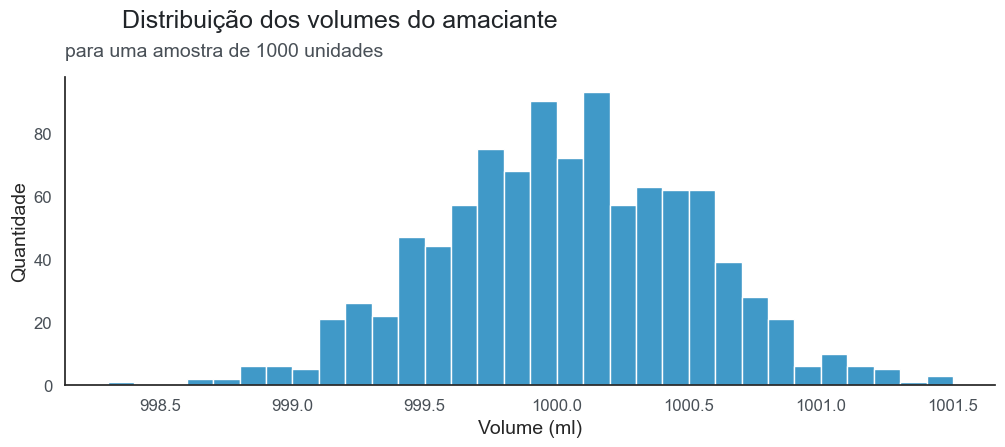

In [30]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style="white")

# Gerando o histograma sem estimativa de densidade
ax = sns.histplot(data=vol_amaciante, x = "Volume", binwidth = 0.1, color = AZUL2)  # ajustando o intervalo pelo largura dos bins
# ax = sns.histplot(data=vol_amaciante, x = "Volume", bins = 30, color = AZUL2)  # ajustando o intervalo pelo quantidade de bins

# # Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

plt.show()

<font color=green size=4> Conclusões: </font>

---

O gráfico de histograma é ideal para quando queremos saber como uma amostra de dados ou população está distribuída. Como podemos observar, o número de intervalos ou a sua largura altera um pouco a visualização, mas não altera os valores centrais da sua distibuição de dados: média e mediana. 

## **4.2 - Gráfico de densidade**

---



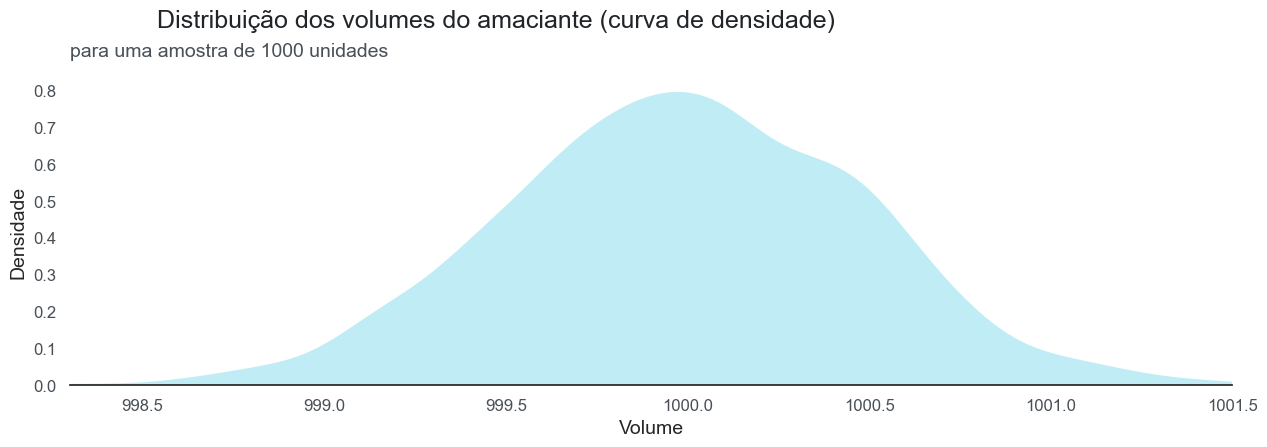

In [31]:
# Gerando a função que desenha a Densidade

def grafico_densidade():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(15,4))
  sns.set_theme(style="white")

  # Gerando a curva de densidade
  ax = sns.kdeplot(data=vol_amaciante, x = "Volume", color = AZUL3, lw = 0, fill = True)

  # # Personalizando o gráfico
  plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color=CINZA1, ha = 'right', x = 0.635, y = 1.05)
  plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Volume', fontsize = 14)
  ax.set_ylabel('Densidade', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
  sns.despine(left = True, top = True)

  return ax

ax = grafico_densidade()

## **4.3 - Adicionando linhas ao gráfico**

---



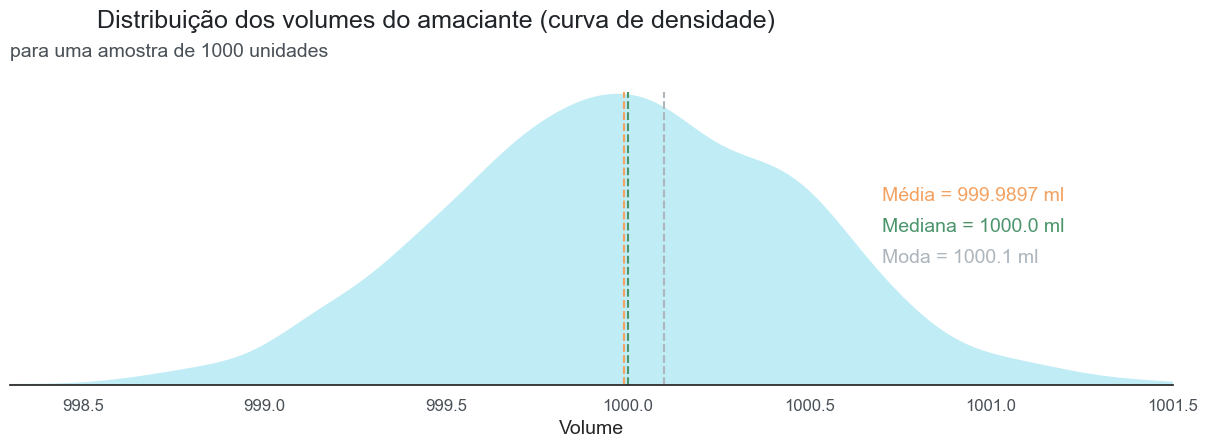

In [32]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Chamando a função que gera o gráfico de densidade
ax = grafico_densidade()

## Personalizando o gráfico
ax.set_ylabel('')
ax.set_yticklabels([])

# Gerando as linhas de média, mediana e moda
estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ["Média", "Mediana", "Moda"]

# Definindo as cores de cada estatística descritiva
cores = [LARANJA1, VERDE1, CINZA3]

# gerando 1 ou mais linhas na vertical a partir de um valor de x
ax.vlines(x = estat, ymin = 0, ymax = 0.8, colors = cores, linestyles='--')

# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color = cores[i], transform=ax.transAxes)

fig = ax.get_figure()

<font color=green size=4> Conclusões: </font>

---

O gráfico de densidade (histograma de linha) é ideal para muitas observações.

Neste exemplo, podemos verificar uma distribuição normal, com uma leve assimetria à esquerda (mediana> média). A moda também está presente no gráfico. Essas 3 medidas de tendência central são importantes para a estatística descritiva dos dados e auxiliam na construção de modelos e análise dos dados.

## **4.4 - Boxplot**

---



### **Pergunta 2 -** Como estão distribuídos os dados dos volumes do amaciante de acordo com a mediana e os quartis? Possuo dados discrepantes?

#### Gerando o gráfico

c:\Users\David\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\text.py:1477: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



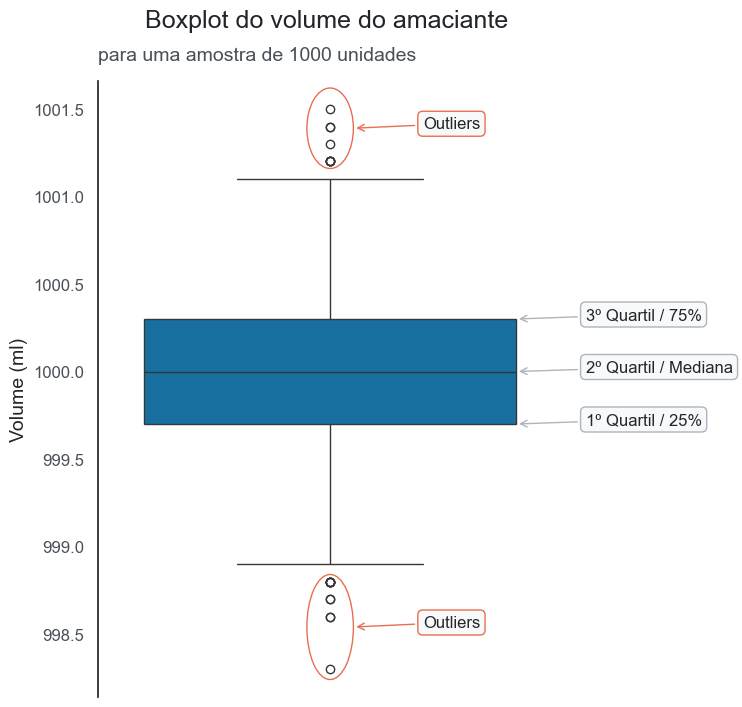

In [33]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data=vol_amaciante, y = "Volume", orient= "v", color = AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))       

plt.show()

<font color=green size=4> Conclusões: </font>

---

O gráfico de boxplot é ideal para representar um conjunto de dados de acordo com 5 medidas de interesse: valor máximo, mínimo, 1º quartil (onde estão situados os primeiros 25% dos dados), 2º quartil ou mediana (onde estão situados 50% dos dados) e 3º quartil (onde estão situados 75% dos dados). 

Há também os outliers que são considerados os pontos discrepante, ou seja, valores que estão distante do padrão dos dados.

 # **Aula 5 - Explorando padrões nos dados**

## **5.1 - Violin Plot**

---




Retomando a nossa situação problema da fábrica de produtos de higiene e limpeza. Vamos agora analisar as observações com as medidas de altura, comprimento e largura de uma caixa de sabão em pó em um total de 1000 amostras medidas. Vamos buscar por padrões em nossas medidas e também verificar se uma das amostras possuem itens que são rejeitados de acordo com as regras do negócio.

#### **Base de dados 2 - Amostras das medidas da embalagem de sabão em pó**

In [34]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")

df_medidas.sample(5)

,comprimento,altura,largura,amostra
785,19.97,15.03,4.95,D
404,19.97,15.03,5.05,C
437,20.16,14.83,5.05,C
193,20.00,15.00,5.01,A
372,20.04,14.96,5.00,B


In [35]:
# Verificando a estatística descritiva das amostras das medidas da embalagem de sabão em pó em forma de tabela
df_medidas.describe()

,comprimento,altura,largura
count,1000.000000,1000.00000,1000.000000
mean,20.025740,14.97233,5.000050
std,0.059189,0.06294,0.051081
min,19.910000,14.69000,4.840000
25%,19.980000,14.93000,4.970000
50%,20.020000,14.99000,5.000000
75%,20.060000,15.02000,5.030000
max,20.250000,15.09000,5.190000


Após visualizarmos de maneira rápida os dados que possuímos, vamos partir para as análises que podemos fazer com esses dados e quais os gráficos de distribuição vamos utilizar a fim de apresentar esse tipo de informação.

### **Questionamentos**

1.   Como está a distribuição das medidas de comprimento da embalagem de sabão em pó para cada uma das amostras?

2.   Como estão dispostas as medidas de comprimento e altura da amostra A? Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está 10% acima ou abaixo do valor de 20 e 15 respectivamente, quais seriam rejeitados?





### **Pergunta 3 -** Como está a distribuição das medidas de comprimento da embalagem de sabão em pó para cada uma das amostras?

#### Visualizando os dados

In [36]:
df_medidas.sample(5)

,comprimento,altura,largura,amostra
535,20.03,14.97,4.93,C
997,20.00,15.00,5.06,E
552,19.96,15.04,4.96,C
828,20.02,14.98,5.00,E
205,19.96,15.04,4.97,B


#### Gerando o gráfico

C:\Users\David\AppData\Local\Temp\ipykernel_13296\2044340955.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




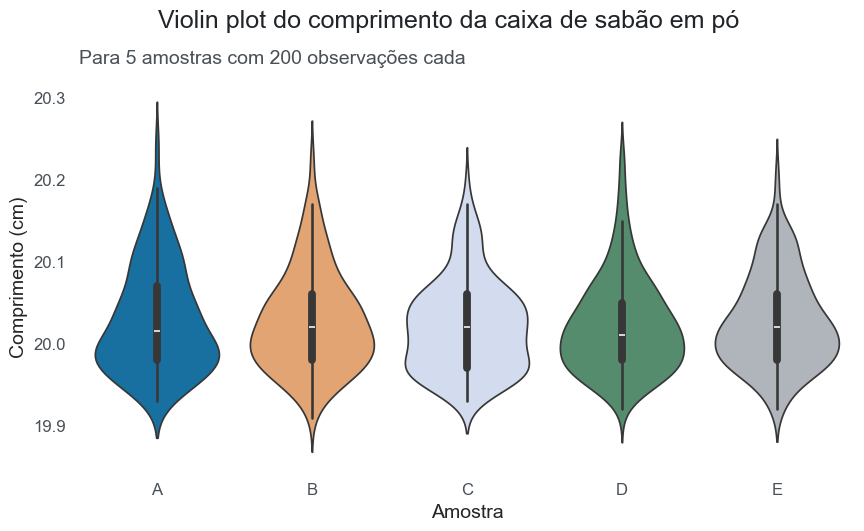

In [37]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Área do gráfico e tema da visualização
fig, axs = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")

# Gerando o violinplot de comprimento, altura e largura
ax = sns.violinplot(data=df_medidas, x = "amostra",  y = "comprimento", palette=[AZUL2, LARANJA1, AZUL5, VERDE1, CINZA3])

## Personalizando o gráfico
plt.suptitle('Violin plot do comprimento da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.785, y = 1.03)
plt.title('Para 5 amostras com 200 observações cada', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Amostra',  fontsize = 14)
ax.set_ylabel('Comprimento (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True, left=True)    

plt.show()

<font color=green size=4> Conclusões: </font>

---

O Violin plot é a união entre o histograma e o boxplot. Nele podemos verificar tanto a distribuição dos dados pela representação da curva, quanto dentro dele percebemos o boxplot com as variáveis de interesse.

Como sugestão, podemos testar essa técnica também com outros valores em nossa base de dados como, por exemplo, na largura ou na altura da caixa. Vale a pena testar se possuímos uma grande diferença entre as amostras e o que podemos observar nessa distribuição.

## **5.2 Gráfico de dispersão**

---



<img src="https://github.com/afonsosr2/dataviz-graficos/blob/3853c7870952376102f2dd09593ef2965c19318c/imagens/Tipos_Graficos/Gr%C3%A1ficos%20de%20distribui%C3%A7%C3%A3o%20(explorando%20padr%C3%B5es%20nos%20dados).png?raw=true" alt="inserir alt" height="343">

<font size=2>Fonte: Andrew Abela (Extreme Presentation/Biuwer)</font>


### **Pergunta 3 -** Como estão dispostas as medidas de comprimento e altura da amostra A? Se quisermos rejeitar todos os itens em que o valor de comprimento e altura está 1% acima ou abaixo do valor de 20 e 15, respectivamente, quais seriam rejeitados?

#### Visualizando os dados

In [38]:
df_a = df_medidas.query("amostra == 'A'")[["comprimento", "altura"]]
df_a.head()

,comprimento,altura
0,20.11,14.89
1,20.13,14.86
2,19.99,15.01
3,20.06,14.93
4,19.99,15.01


#### Gerando o gráfico

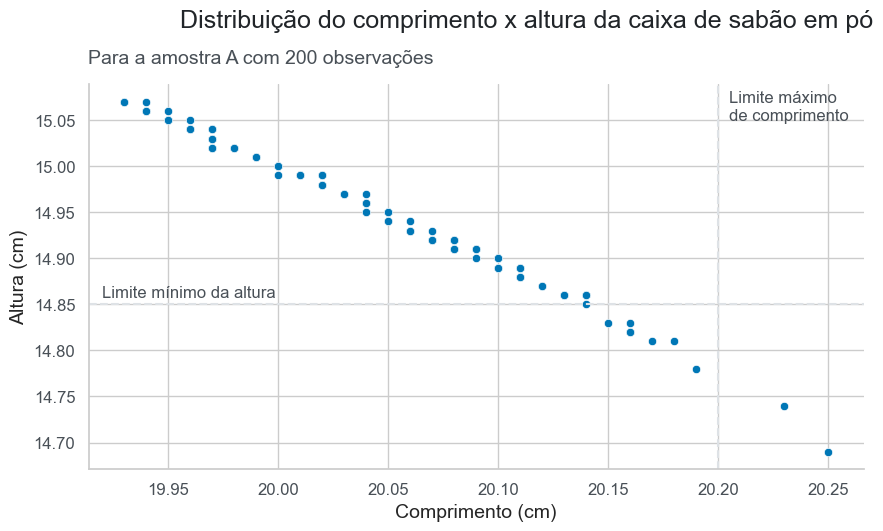

In [39]:
# Gerando a função que cria o gráfico de dispersão

def grafico_dispersao(map_cores: list=[AZUL2], pct: float=0.01):
  # Importando as bibliotecas
  import matplotlib.pyplot as plt
  import seaborn as sns

  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(10,5))
  sns.set_theme(style="white")

  # Gerando o gráfico de dispersão
  ax = sns.scatterplot(data=df_a, x = "comprimento",  y = "altura", color = map_cores)

  ## Personalizando o gráfico
  plt.suptitle('Distribuição do comprimento x altura da caixa de sabão em pó', size=18, color=CINZA1, ha = 'right', x = 0.91, y = 1.03)
  plt.title('Para a amostra A com 200 observações', fontsize=14, color=CINZA2, pad = 15, loc = "left")
  ax.set_xlabel('Comprimento (cm)',  fontsize = 14)
  ax.set_ylabel('Altura (cm)', fontsize = 14)
  ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
  sns.despine()     

  # Desenhando a linha horizontal com o límite mínimo de altura desejado
  ax.text(19.92, 14.855, 'Limite mínimo da altura', fontsize=12, color = CINZA2, va = "bottom")
  plt.axhline(y = 15 * (1 - pct), color = CINZA4, linestyle='--')

  # Desenhando a linha vertical com o límite mínimo de comprimento desejado
  ax.text(20.205, 15.05, 'Limite máximo\nde comprimento', fontsize=12, color = CINZA2, ha="left")
  plt.axvline(x = 20 * (1 + pct), color = CINZA4, linestyle='--')

  return ax

ax = grafico_dispersao()

## **5.3 - Mapeando dados por cores**

---



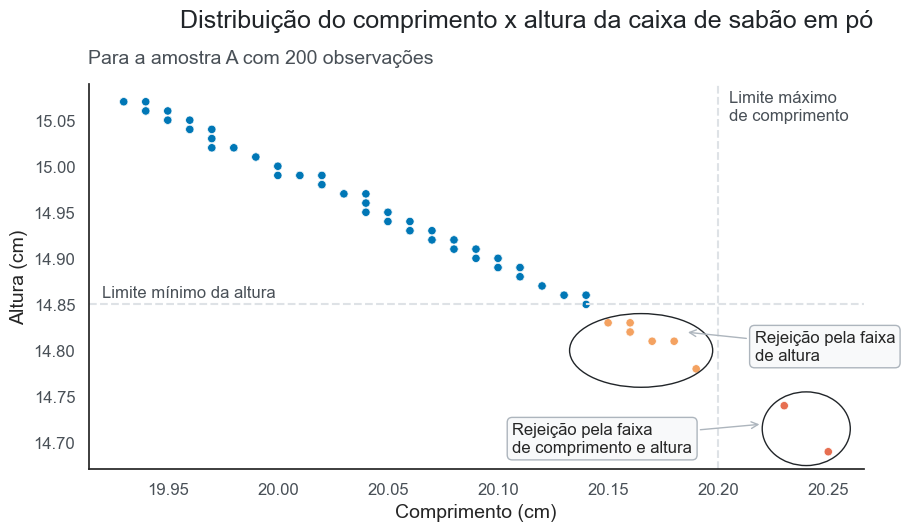

In [40]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
from matplotlib.patches import Ellipse
import numpy as np

# Definindo as cores do gráfico
cores = [VERMELHO1, LARANJA1, AZUL2]

# Gerando o gráfico de dispersão e rejeitando os valores fora da faixa requisitada (1%)        
pct=0.01        
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_a["comprimento"]]
rejeita_alt = [True if (a > 15*(1+pct) or a < 15*(1-pct)) else False for a in df_a["altura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_alt, cores[1], cores[2]))
ax = grafico_dispersao(map_cores, pct)

# Selecionando as áreas de rejeição
rej_comp = Ellipse((20.165, 14.80), width = 0.065, height = 0.08, color=CINZA1, fill=False)
rej_alt = Ellipse((20.24, 14.715), width = 0.04, height = 0.08, color=CINZA1, fill=False)
ax.add_patch(rej_comp)
ax.add_patch(rej_alt)

ax.annotate("Rejeição pela faixa\nde altura", xy=(20.185, 14.82), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3)) 

ax.annotate("Rejeição pela faixa\nde comprimento e altura", xy=(20.22, 14.72), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(-180, -20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

fig = ax.get_figure()

<font color=green size=4> Conclusões: </font>

---

Neste último gráfico de distribuição apresentamos o gráfico de dispersão. Utilizado também para o relacionamento entre os dados, este gráfico como distribuição aponta como as dimensões das caixas estão distruídas entre duas variáveis: comprimento e altura.

Aqui utilizamos dois recursos visuais que é o de acercamento (gerado pela delimitação dos limites máximos e mínimos de comprimento e altura, respectivamente) e o de similaridade por meio das cores, representando os grupos dos valores aceitos, rejeitados por altura e rejeitados por altura e comprimento.